<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов, так как случайные числа неслучайны)

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [657]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

#### 10 случ строк

In [658]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


#### первые и посл 5 объектов

In [659]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [660]:
df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### пропуски

In [661]:
df_train.columns[df_train.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

#### явные дубликаты

In [662]:
df_train[df_train.duplicated(keep=False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
31,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
32,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
33,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1591 CC,121.3 bhp,151Nm@ 4850rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### дашборд

выполнено после предобработки признаков, так как информативнее

In [710]:
from ydata_profiling import ProfileReport

In [748]:
df_copy = df_train.drop(columns = ['mileage', 'engine', 'max_power'])

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [751]:
df_copy

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,engine_num,max_power_num,mileage_num
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,1248,74.00,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5,1498,103.52,21.14
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,1396,90.00,23.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5,1298,88.20,16.10
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,1197,81.86,20.14
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5,1197,82.85,18.50
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5,1493,110.00,16.80
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5,1248,73.90,19.30
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5,1396,70.00,23.57


In [749]:
profile_report

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

<Figure size 432x288 with 0 Axes>

In [750]:
profile_report.to_file('cars_report.html')

/Users/vitaly/opt/anaconda3/lib/python3.8/site-packages/ydata_profiling/profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


AttributeError: 'TransposedFont' object has no attribute 'getbbox'

<Figure size 432x288 with 0 Axes>

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

**выполнено после обработки столбцов**

In [731]:
df_train.describe()

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
count,6999.000000,6.999000e+03,6.999000e+03,6999.000000,6999.000000,6999.000000,6999.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.406915,1452.256894,91.298862,19.460842
std,4.053095,8.089419e+05,5.772400e+04,0.954308,495.151300,35.249719,3.877429
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,624.000000,32.800000,9.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,1197.000000,68.085000,16.800000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,1248.000000,81.860000,19.100000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000,1582.000000,100.600000,22.150000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,3604.000000,400.000000,42.000000


In [732]:
df_train_engine_num_median = df_train.engine_num.median()

In [733]:
df_train_max_power_num_median = df_train.max_power_num.median()

In [734]:
df_train_mileage_num_median = df_train.mileage_num.median()

In [735]:
df_train_seats_median = df_train.seats.median()

так как все NA заменялись на ноль - заменим ноль медианами

In [736]:
df_train.engine_num = df_train.engine_num.replace(0, df_train_engine_num_median)

In [737]:
df_train.max_power_num = df_train.max_power_num.replace(0, df_train_max_power_num_median)

In [738]:
df_train.mileage_num = df_train.mileage_num.replace(0, df_train_mileage_num_median)

In [739]:
df_train.seats = df_train.seats.replace(0, df_train_seats_median)

в тесте

In [740]:
df_test.engine_num = df_test.engine_num.replace(0, df_train_engine_num_median)

In [741]:
df_test.max_power_num = df_test.max_power_num.replace(0, df_train_max_power_num_median)

In [742]:
df_test.mileage_num = df_test.mileage_num.replace(0, df_train_mileage_num_median)

In [743]:
df_test.seats = df_test.seats.replace(0, df_train_seats_median)

убедимся в результате

In [744]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
seats              0
engine_num         0
max_power_num      0
mileage_num        0
dtype: int64

In [745]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
seats             0
engine_num        0
max_power_num     0
mileage_num       0
dtype: int64

In [746]:
df_train.query('seats == 0 | engine_num == 0 | max_power_num == 0 | mileage_num == 0')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,engine_num,max_power_num,mileage_num


In [747]:
df_test.query('seats == 0 | engine_num == 0 | max_power_num == 0 | mileage_num == 0')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,engine_num,max_power_num,mileage_num


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


#### объекты с одинаковым признаковым описанием 

In [663]:
df_train_features = df_train.drop(columns = ['selling_price'])

In [664]:
df_train_features.duplicated().sum()
# 1159 одинаковых записей

1159

#### такие объекты на вид 

In [665]:
df_train_features[df_train_features.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### удаление повторяющихся строк 

In [666]:
df_train_no_dup = df_train.drop_duplicates(subset = df_train_features.columns,
                                           keep = 'first')

#### обновление индекса строк

In [667]:
df_train_no_dup = df_train_no_dup.reset_index(drop = True)

In [668]:
df_train_no_dup

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [669]:
# your code here

#### убирание единиц измерения

In [670]:
import re

In [671]:
def number_extraction(text):
    return re.sub(r'[a-zA-Z]', '', str(text))

In [672]:
def remove_letters_and_slash(input_string):
    # Убираем все буквы и символ '/'
    result = ''.join(c for c in str(input_string) if not (c.isalpha() or c == '/'))
    return result.strip() 

In [673]:
df_train['engine_num'] = df_train['engine'].apply(remove_letters_and_slash)
df_train['max_power_num'] = df_train['max_power'].apply(remove_letters_and_slash)
df_train['mileage_num'] = df_train['mileage'].apply(remove_letters_and_slash)

In [674]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_num,max_power_num,mileage_num
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248,74,23.4


In [675]:
df_test['engine_num'] = df_test['engine'].apply(remove_letters_and_slash)
df_test['max_power_num'] = df_test['max_power'].apply(remove_letters_and_slash)
df_test['mileage_num'] = df_test['mileage'].apply(remove_letters_and_slash)

In [676]:
df_test.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_num,max_power_num,mileage_num
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0,2498,112,14.0


#### приведите тип данных к float 

In [677]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
engine_num        object
max_power_num     object
mileage_num       object
dtype: object

чтобы привести к float, надо заменить пустоту на какое-то значение - заменим на ноль, так как этого значения нет 

In [678]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
engine_num         0
max_power_num      0
mileage_num        0
dtype: int64

In [679]:
df_train.mileage_num.unique()

array(['23.4', '21.14', '23.0', '16.1', '20.14', '17.3', '23.59', '20.0',
       '19.01', '19.3', '', '18.9', '18.15', '19.7', '22.54', '21.0',
       '25.5', '26.59', '21.5', '21.4', '24.7', '18.2', '16.8', '24.3',
       '14.0', '33.44', '23.95', '17.0', '20.63', '13.93', '16.0', '17.8',
       '12.55', '12.99', '14.8', '13.5', '26.0', '27.3', '11.36', '17.68',
       '18.53', '14.84', '21.12', '20.36', '21.27', '18.16', '22.0',
       '25.1', '20.51', '21.66', '25.2', '22.9', '16.02', '20.54',
       '22.77', '15.71', '23.1', '19.02', '19.81', '26.2', '16.47',
       '15.04', '18.5', '19.1', '21.79', '18.8', '21.21', '11.79', '19.0',
       '14.3', '15.1', '19.09', '22.32', '21.9', '14.53', '21.63',
       '20.85', '20.45', '19.67', '23.01', '17.92', '20.77', '17.01',
       '22.37', '19.33', '12.83', '22.48', '16.78', '14.67', '15.0',
       '13.96', '14.28', '18.0', '12.07', '26.21', '10.8', '13.6', '16.3',
       '14.74', '15.6', '19.56', '22.69', '19.16', '18.12', '12.1',
      

In [680]:
df_train.engine_num.unique()

array(['1248', '1498', '1396', '1298', '1197', '1061', '796', '1364',
       '1399', '1461', '993', '', '1198', '998', '1591', '2179', '1368',
       '1497', '2982', '2494', '2143', '2477', '2755', '1968', '1196',
       '1373', '1598', '1998', '1086', '1194', '1798', '1405', '1582',
       '999', '2487', '1999', '2987', '1995', '1451', '1969', '2967',
       '2497', '1797', '1991', '2362', '1493', '1341', '1199', '1794',
       '1193', '2696', '799', '1495', '1186', '1047', '2498', '2523',
       '1120', '624', '1496', '1984', '2354', '793', '1799', '936',
       '1956', '814', '1997', '1948', '2997', '1172', '2489', '2499',
       '2609', '2953', '1150', '1994', '1388', '1462', '2956', '1527',
       '2199', '995', '1599', '2993', '1586', '1390', '909', '2393',
       '3198', '1499', '3604', '1339', '2092', '1595', '2496', '1596',
       '1597', '2596', '2148', '1299', '1590', '2231', '2694', '2200',
       '1795', '1896', '1796', '1422', '1489', '2359', '2197', '2999',
       '1781'

In [681]:
df_train.max_power_num.unique()

array(['74', '103.52', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', '', '67', '82', '46.3', '88.73',
       '64.1', '98.6', '88.8', '83.1', '47.3', '73.8', '34.2', '88.5',
       '35', '40.3', '121.3', '138.03', '160.77', '117.3', '116.3',
       '67.05', '168.5', '100', '120.7', '98.63', '175.56', '171.5',
       '100.6', '174.33', '187.74', '170', '78.9', '88.76', '86.8',
       '108.495', '108.62', '93.7', '103.6', '98.59', '189', '67.04',
       '68.05', '58.2', '82.85', '81.80', '120', '94.68', '160', '155',
       '69.01', '126.32', '138.1', '83.14', '83.8', '126.2', '62.1',
       '86.7', '188', '214.56', '177', '148.31', '254.79', '190',
       '177.46', '204', '141', '241.4', '282', '150', '108.5', '147.5',
       '103.5', '183', '181.04', '157.7', '164.7', '91.1', '400', '68',
       '81.83', '75', '85.8', '87.2', '53', '118', '83', '84', '58.16',
       '147.94', '74.02', '80', '88.7', '97.7', '121.36', '162', '53.3',
       '140', '73'

In [682]:
df_train['engine_num'] = df_train['engine_num'].replace({'': 0})
df_train['max_power_num'] = df_train['max_power_num'].replace({'': 0})
df_train['mileage_num'] = df_train['mileage_num'].replace({'': 0})

In [683]:
df_test['engine_num'] = df_test['engine_num'].replace({'': 0})
df_test['max_power_num'] = df_test['max_power_num'].replace({'': 0})
df_test['mileage_num'] = df_test['mileage_num'].replace({'': 0})

In [684]:
df_train['engine_num'] = df_train['engine_num'].astype('int')
df_train['max_power_num'] = df_train['max_power_num'].astype('float')
df_train['mileage_num'] = df_train['mileage_num'].astype('float')

In [685]:
df_test['engine_num'] = df_test['engine_num'].astype('int')
df_test['max_power_num'] = df_test['max_power_num'].astype('float')
df_test['mileage_num'] = df_test['mileage_num'].astype('float')

In [686]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
engine_num         int64
max_power_num    float64
mileage_num      float64
dtype: object

In [687]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
engine_num         int64
max_power_num    float64
mileage_num      float64
dtype: object

заменим нулевые значения на NA

#### удаление столбца torque

In [688]:
df_train = df_train.drop(columns = ['torque'])

In [689]:
df_test = df_test.drop(columns = ['torque'])

In [690]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'engine_num', 'max_power_num', 'mileage_num'],
      dtype='object')

In [691]:
df_test.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'engine_num', 'max_power_num', 'mileage_num'],
      dtype='object')

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [692]:
# осталось привести только seats
df_train.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

заменим nan на ноль

In [693]:
df_train['seats'] = df_train['seats'].fillna(0)
df_test['seats'] = df_test['seats'].fillna(0)

In [694]:
df_train.seats.unique()

array([ 5.,  4.,  0.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [695]:
df_train['seats'] = df_train['seats'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

In [696]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats              int64
engine_num         int64
max_power_num    float64
mileage_num      float64
dtype: object

In [697]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats              int64
engine_num         int64
max_power_num    float64
mileage_num      float64
dtype: object

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

#### осн статистики по числовым столбцам

In [698]:
df_train.describe()

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
count,6999.000000,6.999000e+03,6.999000e+03,6999.000000,6999.000000,6999.000000,6999.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.262609,1416.238034,88.924583,18.865928
std,4.053095,8.089419e+05,5.772400e+04,1.314903,550.955108,38.420286,5.145324
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,1196.000000,67.100000,16.470000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,1248.000000,81.860000,19.100000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000,1582.000000,100.600000,22.150000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,3604.000000,400.000000,42.000000


In [699]:
df_test.describe()

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,5.308000,1431.16400,89.286330,18.970780
std,4.012149,7.585539e+05,48486.218662,1.173249,557.99609,37.020828,4.753277
min,1995.000000,3.100000e+04,1303.000000,0.000000,0.00000,0.000000,0.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000,1196.00000,68.000000,16.200000
50%,2014.000000,4.349990e+05,61500.000000,5.000000,1248.00000,82.425000,19.250000
75%,2017.000000,6.700000e+05,100000.000000,5.000000,1582.00000,102.000000,22.300000
max,2020.000000,6.000000e+06,375000.000000,9.000000,3604.00000,280.000000,32.260000


#### осн статистики по категориальным столбцам

In [700]:
df_train.drop(columns = ['mileage', 'engine', 'max_power']).describe(include = 'object')

,name,fuel,seller_type,transmission,owner
count,6999,6999,6999,6999,6999
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,116,3793,5826,6095,4587


In [701]:
df_test.drop(columns = ['mileage', 'engine', 'max_power']).describe(include = 'object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

#### шаг 1. попарные распределения

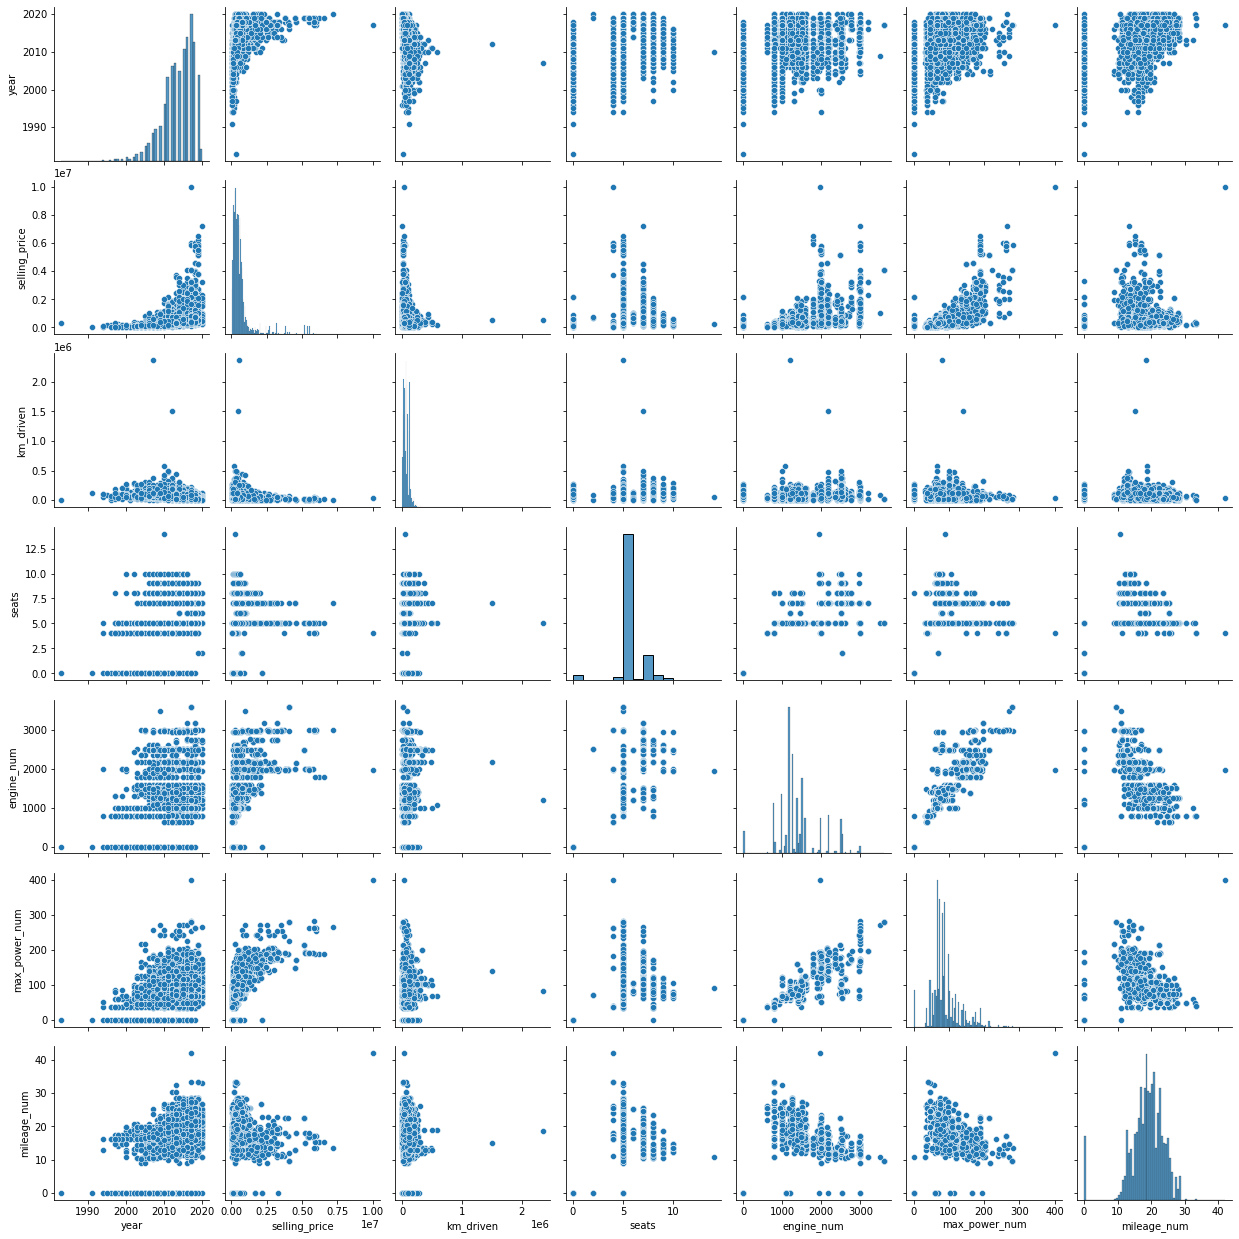

In [702]:
sns.pairplot(df_train)

#### шаг 1. ответы на вопросы

С целевой переменной ярко связан год машины (year), максимальная мощность (max_power_num) и двигатель (engine_num)

По признакам, 
- положительная корреляция заметна у двигателя (engine_num) и максимальной мощностью(max_power_num)
- отрицательная корреляция заметна у mileage_num и engine_num, max_power_num и даже seats

#### шаг 2. pairplot по тестовым 

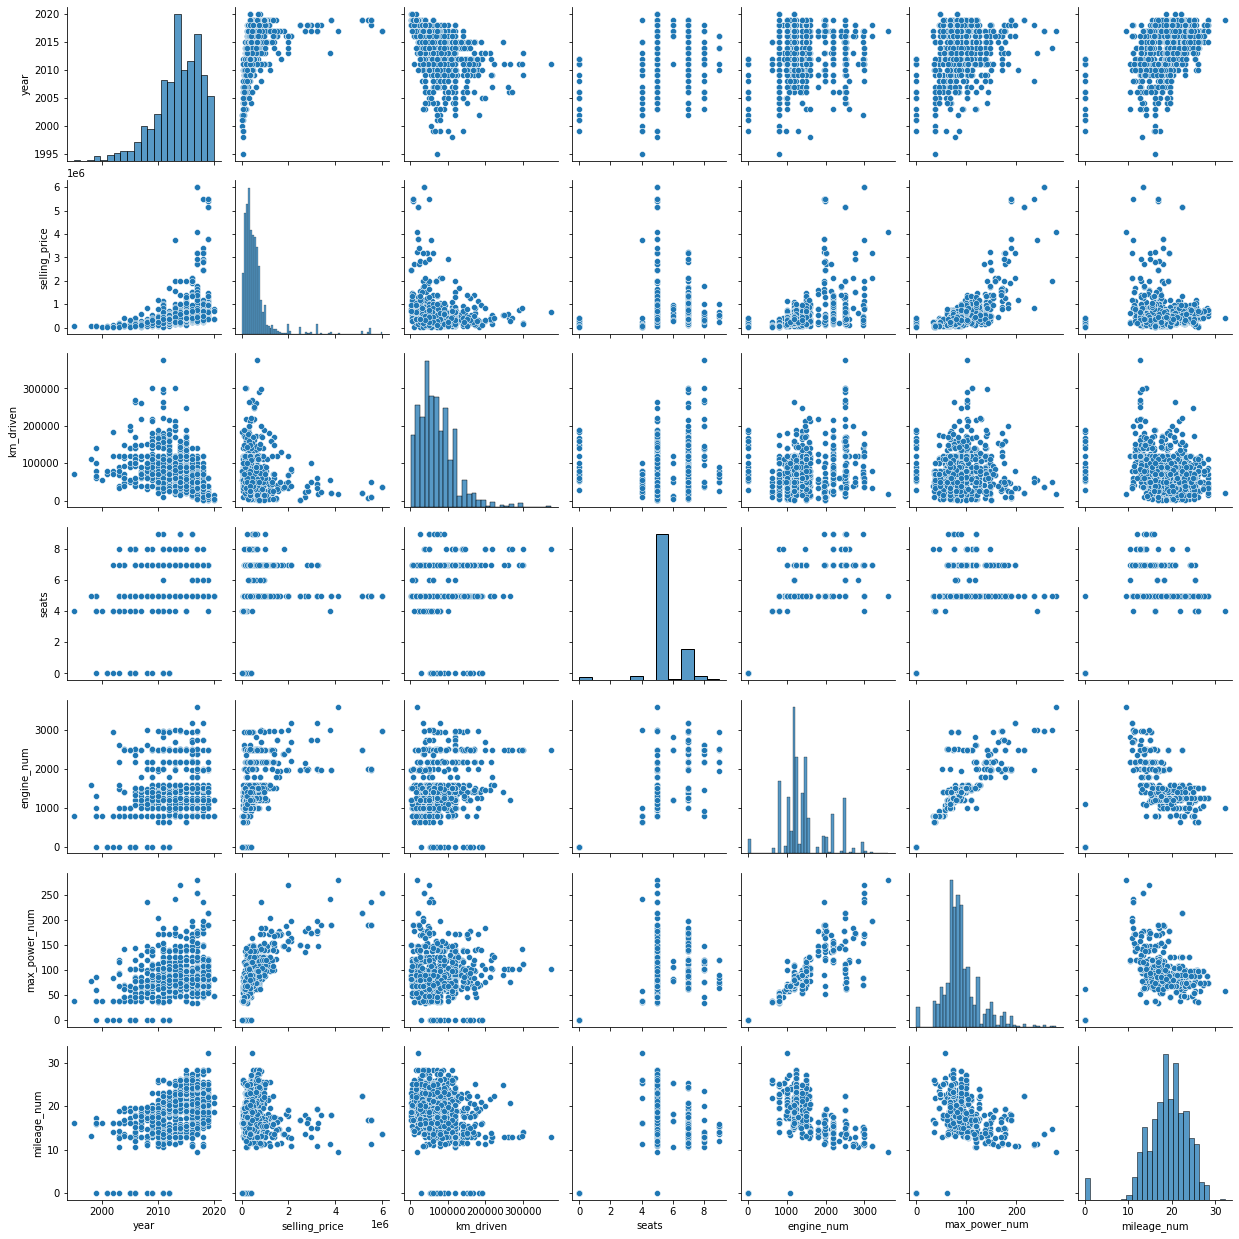

In [703]:
sns.pairplot(df_test)

#### шаг 2. ответ на вопрос

принципиальных отличий в распределениях не наблюдаю

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [704]:
df_train.corr(numeric_only = True)

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
year,1.000000,0.413242,-0.411504,0.180231,0.137346,0.301534,0.408343
selling_price,0.413242,1.000000,-0.222218,0.087817,0.444634,0.717987,-0.040553
km_driven,-0.411504,-0.222218,1.000000,0.112766,0.145019,-0.064779,-0.163758
seats,0.180231,0.087817,0.112766,1.000000,0.700457,0.396750,0.184355
engine_num,0.137346,0.444634,0.145019,0.700457,1.000000,0.753130,-0.117416
max_power_num,0.301534,0.717987,-0.064779,0.396750,0.753130,1.000000,-0.011285
mileage_num,0.408343,-0.040553,-0.163758,0.184355,-0.117416,-0.011285,1.000000


In [705]:
df_train.select_dtypes(include='number')

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
0,2014,450000,145500,5,1248,74.00,23.40
1,2014,370000,120000,5,1498,103.52,21.14
2,2010,225000,127000,5,1396,90.00,23.00
3,2007,130000,120000,5,1298,88.20,16.10
4,2017,440000,45000,5,1197,81.86,20.14
...,...,...,...,...,...,...,...
6994,2013,320000,110000,5,1197,82.85,18.50
6995,2007,135000,119000,5,1493,110.00,16.80
6996,2009,382000,120000,5,1248,73.90,19.30
6997,2013,290000,25000,5,1396,70.00,23.57


In [706]:
df_train.select_dtypes(include='number')

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
0,2014,450000,145500,5,1248,74.00,23.40
1,2014,370000,120000,5,1498,103.52,21.14
2,2010,225000,127000,5,1396,90.00,23.00
3,2007,130000,120000,5,1298,88.20,16.10
4,2017,440000,45000,5,1197,81.86,20.14
...,...,...,...,...,...,...,...
6994,2013,320000,110000,5,1197,82.85,18.50
6995,2007,135000,119000,5,1493,110.00,16.80
6996,2009,382000,120000,5,1248,73.90,19.30
6997,2013,290000,25000,5,1396,70.00,23.57


In [707]:
df_train_numeric = df_train.select_dtypes(include='number')

In [708]:
df_train_numeric.dtypes

year               int64
selling_price      int64
km_driven          int64
seats              int64
engine_num         int64
max_power_num    float64
mileage_num      float64
dtype: object

<Axes: >

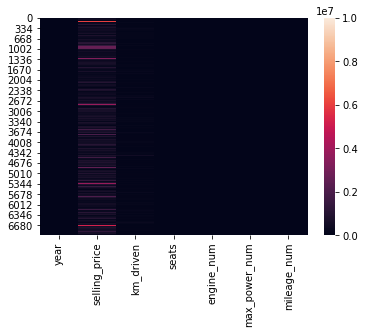

In [709]:
sns.heatmap(df_train_numeric)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

heatmap по какой-то причине не рисуется - оценим по корреляционной матрице

1) наименшая корреляция у year & seats и year & engine_num \
2) Между max_power_num & engine_power_num наблюдается сильная положительная связь \
3) Да, так как корреляция отрицательная: когда год растет, километраж падает и наоборот

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [752]:
df_train_num_features = df_train.drop(columns = ['mileage', 
                                                 'engine', 
                                                 'max_power']) \
                                .select_dtypes(include='number')

In [753]:
df_test_num_features = df_test.drop(columns = ['mileage', 
                                               'engine', 
                                               'max_power']) \
                              .select_dtypes(include='number')

In [754]:
df_train_num_features.head()

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
0,2014,450000,145500,5,1248,74.00,23.40
1,2014,370000,120000,5,1498,103.52,21.14
2,2010,225000,127000,5,1396,90.00,23.00
3,2007,130000,120000,5,1298,88.20,16.10
4,2017,440000,45000,5,1197,81.86,20.14


In [755]:
df_test_num_features.head()

,year,selling_price,km_driven,seats,engine_num,max_power_num,mileage_num
0,2010,229999,168000,7,2498,112.0,14.0
1,2017,665000,25000,5,1497,108.5,21.5
2,2007,175000,218463,5,1799,130.0,12.9
3,2015,635000,173000,5,1498,98.6,25.1
4,2011,130000,70000,5,1172,65.0,16.5


In [756]:
y_train = df_train_num_features['selling_price']
X_train = df_train_num_features.drop(columns = ['selling_price'])

In [757]:
y_test = df_test_num_features['selling_price']
X_test = df_test_num_features.drop(columns = ['selling_price'])

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [758]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

reg = LinearRegression().fit(X_train, y_train)
y_pred_not_scaled = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [759]:
MSE(y_test, y_pred_not_scaled)

201509243838.5539

In [760]:
MSE(y_train, y_pred_train)

235442684170.23657

In [761]:
r2_score(y_test, y_pred_not_scaled)
# качество среднее

0.6494446181179294

In [762]:
r2_score(y_train, y_pred_train)
# качество среднее

0.6401573955663995

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [763]:
from sklearn.preprocessing import StandardScaler

train

In [764]:
scaler = StandardScaler()
scaled_x_train = scaler.fit(X_train)

In [765]:
scaled_x_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaled_x_train.head()

,year,km_driven,seats,engine_num,max_power_num,mileage_num
0,0.044808,1.315238,-0.426429,-0.412544,-0.490787,1.015993
1,0.044808,0.873449,-0.426429,0.092389,0.346726,0.433091
2,-0.942163,0.994725,-0.426429,-0.113624,-0.036850,0.912824
3,-1.682391,0.873449,-0.426429,-0.311557,-0.087918,-0.866832
4,0.785036,-0.425930,-0.426429,-0.515550,-0.267790,0.175169


In [766]:
scaled_x_test = pd.DataFrame(scaler.transform(X_test), 
                               columns=X_test.columns)
scaled_x_test.head()

,year,km_driven,seats,engine_num,max_power_num,mileage_num
0,-0.942163,1.705052,1.669480,2.112118,0.587313,-1.408467
1,0.785036,-0.772431,-0.426429,0.090369,0.488014,0.525942
2,-1.682391,2.579326,-0.426429,0.700327,1.097992,-1.692180
3,0.291550,1.791677,-0.426429,0.092389,0.207141,1.454459
4,-0.695420,0.007197,-0.426429,-0.566043,-0.746126,-0.763664


In [767]:
reg_standard = LinearRegression().fit(scaled_x_train, y_train)

In [768]:
y_pred_stand_features = reg_standard.predict(scaled_x_test)

In [769]:
MSE(y_pred_stand_features, y_test)

201509243838.55328

In [770]:
r2_score(y_test, y_pred_stand_features)

0.6494446181179305

качество чуть-чуть возрасло

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [771]:
reg_standard.coef_

array([161411.40863502, -75777.90851973, -63421.20958391,  54574.69519399,
       559061.43391606,  51099.58530153])

признак max_power_num самый важный (5-ый)

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [772]:
from sklearn.linear_model import Lasso

# your code here

#### L-1

In [773]:
lasso = Lasso(alpha=0.1)  # alpha - это коэффициент регуляризации

# Обучаем модель
lasso.fit(scaled_x_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred_l1 = lasso.predict(scaled_x_test)

In [774]:
MSE(y_pred_l1, y_test)

201509237598.7133

In [775]:
r2_score(y_pred_l1, y_test)

0.4973811251207596

In [776]:
lasso.coef_

array([161411.47558409, -75777.83624311, -63421.37039742,  54574.83547678,
       559061.17550226,  51099.38420725])

In [777]:
lasso = Lasso(alpha=0.5)  # alpha - это коэффициент регуляризации

# Обучаем модель
lasso.fit(scaled_x_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred_l1 = lasso.predict(scaled_x_test)

In [778]:
MSE(y_pred_l1, y_test)

201509213091.99203

In [779]:
r2_score(y_pred_l1, y_test)

0.4973804541600575

In [780]:
lasso.coef_

array([161411.7373208 , -75777.54455155, -63421.98030587,  54575.34798495,
       559060.17177646,  51098.5809097 ])

In [781]:
lasso = Lasso(alpha=0.8)  # alpha - это коэффициент регуляризации

# Обучаем модель
lasso.fit(scaled_x_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred_l1 = lasso.predict(scaled_x_test)

In [782]:
MSE(y_pred_l1, y_test)

201509186700.45407

In [783]:
r2_score(y_pred_l1, y_test)

0.4973800331987779

In [784]:
lasso.coef_

array([161412.04110929, -75777.37163733, -63423.02922831,  54576.5948518 ,
       559058.88808763,  51097.9592865 ])

качество сильно снизилось, коэффициенты не занулились

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [785]:
from sklearn.model_selection import GridSearchCV

# your code here

In [786]:
# Определяем модель
model = Lasso()

# Задаем параметры для поиска
param_grid = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='r2', 
                           cv=10, 
                           n_jobs=-1)

# Обучаем модели на обучающей выборке
grid_search.fit(scaled_x_train, y_train)

# Лучшая комбинация параметров
print("Лучший параметр:", grid_search.best_params_)

Лучший параметр: {'alpha': 0.9}


лучший коэффициент alpha = 0.9

In [787]:
y_pred_grd_srch_lasso = grid_search.predict(scaled_x_test)

In [788]:
MSE(y_test, y_pred_grd_srch_lasso)

201509186008.2447

In [789]:
r2_score(y_test, y_pred_grd_srch_lasso)

0.6494447187223769

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [790]:
from sklearn.linear_model import ElasticNet

# Определяем модель
model = ElasticNet()

# Задаем параметры для поиска
param_grid = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='r2', 
                           cv=10, 
                           n_jobs=-1)

# Обучаем модели на обучающей выборке
grid_search.fit(scaled_x_train, y_train)

# Лучшая комбинация параметров
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'alpha': 0.5, 'l1_ratio': 0.9}


Лучшие параметры alpha = 0.5 l1_ratio = 0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [791]:
df_train.name

0              Maruti Swift Dzire VDI
1        Skoda Rapid 1.5 TDI Ambition
2           Hyundai i20 Sportz Diesel
3              Maruti Swift VXI BSIII
4       Hyundai Xcent 1.2 VTVT E Plus
                    ...              
6994                Hyundai i20 Magna
6995            Hyundai Verna CRDi SX
6996           Maruti Swift Dzire ZDi
6997                  Tata Indigo CR4
6998                  Tata Indigo CR4
Name: name, Length: 6999, dtype: object

In [792]:
df_train = df_train.drop(columns = ['name'])

In [793]:
df_test = df_test.drop(columns = ['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [794]:
# assert X_train_cat.shape == (5840, 10)

In [795]:
# X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [796]:
df_train.describe(include='object').columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power'],
      dtype='object')

In [797]:
df_train.head(1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,engine_num,max_power_num,mileage_num
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,1248,74.0,23.4


In [798]:
df_train_clear = df_train.drop(columns=['mileage', 'engine','max_power', 'selling_price'])

In [799]:
df_test_clear = df_test.drop(columns=['mileage', 'engine','max_power', 'selling_price'])

In [800]:
df_train_clear.head(1)

,year,km_driven,fuel,seller_type,transmission,owner,seats,engine_num,max_power_num,mileage_num
0,2014,145500,Diesel,Individual,Manual,First Owner,5,1248,74.0,23.4


In [801]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse = False
                   )
# fit train
ohe.fit(df_train_clear[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
train_array = ohe.transform(df_train_clear[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
names = ohe.get_feature_names(['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

# ohe df
ohe_df = pd.DataFrame(train_array, columns=names)

# merge c другими столбцами
df_train_ohe = df_train_clear.drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats']) \
                       .reset_index(drop=True) \
                       .join(ohe_df)

In [802]:
ohe_df.head(3)

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [803]:
df_train_ohe.head()

,year,km_driven,engine_num,max_power_num,mileage_num,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,1248,74.00,23.40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,1498,103.52,21.14,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,1396,90.00,23.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,1298,88.20,16.10,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,1197,81.86,20.14,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [804]:
df_train_encoded

,year_1983,year_1991,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,...,mileage_num_27.39,mileage_num_27.4,mileage_num_27.62,mileage_num_28.09,mileage_num_28.4,mileage_num_30.46,mileage_num_32.52,mileage_num_33.0,mileage_num_33.44,mileage_num_42.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [805]:
df_train_encoded.head()

,year_1983,year_1991,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,...,mileage_num_27.39,mileage_num_27.4,mileage_num_27.62,mileage_num_28.09,mileage_num_28.4,mileage_num_30.46,mileage_num_32.52,mileage_num_33.0,mileage_num_33.44,mileage_num_42.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


test

In [806]:
# train

test_array = ohe.transform(df_test_clear[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
names = ohe.get_feature_names(['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

# ohe df
ohe_df = pd.DataFrame(test_array, columns=names)

# merge c другими столбцами
df_test_ohe = df_test_clear.drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats']) \
                       .reset_index(drop=True) \
                       .join(ohe_df)

In [807]:
df_test_ohe.head()

,year,km_driven,engine_num,max_power_num,mileage_num,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,168000,2498,112.0,14.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,1497,108.5,21.5,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,218463,1799,130.0,12.9,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,1498,98.6,25.1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,70000,1172,65.0,16.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [808]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Определяем модель
model = Ridge()

# Задаем параметры для поиска
param_grid = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='r2', 
                           cv=10, 
                           n_jobs=-1)

# Обучаем модели на обучающей выборке
grid_search.fit(df_train_ohe, y_train)

# Лучшая комбинация параметров
print("Лучший параметр:", grid_search.best_params_)

Лучший параметр: {'alpha': 0.9}


In [809]:
y_pred_ridge_ohe = grid_search.predict(df_test_ohe)

In [810]:
r2_score(y_pred_ridge_ohe, y_test)

0.5848890911094105

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [811]:
def business_metric(y_true, y_pred):
    subtraction_array = abs(y_true - y_pred)
    relat_array = subtraction_array / abs(y_true)
    
    filter_perc = relat_array <= 0.1
    metric = len(subtraction_array[filter_perc]) / len(subtraction_array)
    
    return metric*100

In [812]:
# просто по числовым признакам
business_metric(y_pred_not_scaled, y_test)

15.4

In [813]:
# масштабированные признаки
business_metric(y_pred_stand_features, y_test)

15.4

In [814]:
# только L1 на масштабированных
business_metric(y_pred_grd_srch_lasso, y_test)

15.4

In [815]:
# с категориальными фичами и L2
business_metric(y_pred_ridge_ohe, y_test)

16.2

**Вывод: по бизнес метрике лучшая модель получилась при L2 регуляризации и закодированных категориальных переменных**

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [513]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

